In [8]:
from collections import namedtuple
from copy import copy
 
Colour = namedtuple('Colour','r,g,b')
Colour.copy = lambda self: copy(self)
 
black = Colour(0,0,0)
white = Colour(255,255,255) # Colour ranges are not enforced.
 
class Bitmap():
    def __init__(self, width = 40, height = 40, background=white):
        assert width > 0 and height > 0 and type(background) == Colour
        self.width = width
        self.height = height
        self.background = background
        self.map = [[background.copy() for w in range(width)] for h in range(height)]
 
    def fillrect(self, x, y, width, height, colour=black):
        assert x >= 0 and y >= 0 and width > 0 and height > 0 and type(colour) == Colour
        for h in range(height):
            for w in range(width):
                self.map[y+h][x+w] = colour.copy()
 
    def chardisplay(self):
        txt = [''.join(' ' if bit==self.background else '@'
                       for bit in row)
               for row in self.map]
        # Boxing
        txt = ['|'+row+'|' for row in txt]
        txt.insert(0, '+' + '-' * self.width + '+')
        txt.append('+' + '-' * self.width + '+')
        print('\n'.join(reversed(txt)))
 
    def set(self, x, y, colour=black):
        assert type(colour) == Colour
        self.map[y][x]=colour
 
    def get(self, x, y):
	    return self.map[y][x]
 
 
bitmap = Bitmap(20,10)
bitmap.fillrect(4, 5, 6, 3)
assert bitmap.get(5, 5) == black
assert bitmap.get(0, 1) == white
bitmap.set(0, 1, black)
assert bitmap.get(0, 1) == black
bitmap.chardisplay()

+--------------------+
|                    |
|                    |
|    @@@@@@          |
|    @@@@@@          |
|    @@@@@@          |
|                    |
|                    |
|                    |
|@                   |
|                    |
+--------------------+


In [11]:

def line(self, x0, y0, x1, y1):
    "Bresenham's line algorithm"
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    x, y = x0, y0
    sx = -1 if x0 > x1 else 1
    sy = -1 if y0 > y1 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x1:
            self.set(x, y)
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y1:
            self.set(x, y)
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy        
    self.set(x, y)
Bitmap.line = line
 
bitmap = Bitmap(17,17)
for points in ((1,8,8,16),(8,16,16,8),(16,8,8,1),(8,1,1,8)):
    bitmap.line(*points)
bitmap.chardisplay()

+-----------------+
|        @        |
|       @ @       |
|      @   @      |
|     @     @     |
|    @       @    |
|    @        @   |
|   @          @  |
|  @            @ |
| @              @|
|  @            @ |
|   @          @  |
|    @       @@   |
|     @     @     |
|      @   @      |
|       @ @       |
|        @        |
|                 |
+-----------------+


In [43]:
def circle_brez(cx, cy, r):
    x = 0   # задание начальных значений
    y = r
    d = 2 - 2 * r   # значение D(x,y)  при (0,R)
    while y >= 0:
        # высвечивание текущего пиксела
        
        pixels[cx + x, cy + y] = (0, 0 ,0)
        pixels[cx + x, cy - y] = (0, 0 ,0)
        pixels[cx - x, cy + y] = (0, 0 ,0)
        pixels[cx - x, cy - y] = (0, 0 ,0)

        if d < 0:  # пиксель лежит внутри окружности
            buf = 2 * d + 2 * y - 1
            x += 1

            if buf <= 0:  # горизонтальный шаг
                d = d + 2 * x + 1
            else:  # диагональный шаг
                y -= 1
                d = d + 2 * x - 2 * y + 2

            continue

        if d > 0:  # пиксель лежит вне окружности
            buf = 2 * d - 2 * x - 1
            y -= 1

            if buf > 0:  # вертикальный шаг
                d = d - 2 * y + 1
            else:  # диагональный шаг
                x += 1
                d = d + 2 * x - 2 * y + 2

            continue

        if d == 0.0:  # пиксель лежит на окружности
            x += 1   # диагональный шаг
            y -= 1
            d = d + 2 * x - 2 * y + 2


In [35]:
def ellips_brez(cx, cy, a, b):
    x = 0  # начальные значения
    y = b
    a = a ** 2
    d = round(b * b / 2 - a * b * 2 + a / 2)
    b = b ** 2
    while y >= 0:
        pixels[cx + x, cy + y] = (0, 0 ,0)
        pixels[cx + x, cy - y] = (0, 0 ,0)
        pixels[cx - x, cy + y] = (0, 0 ,0)
        pixels[cx - x, cy - y] = (0, 0 ,0)
        if d < 0:  # пиксель лежит внутри эллипса
            buf = 2 * d + 2 * a * y - a
            x += 1
            if buf <= 0:  # горизотальный шаг
                d = d + 2 * b * x + b
            else:  # диагональный шаг
                y -= 1
                d = d + 2 * b * x - 2 * a * y + a + b

            continue

        if d > 0:  # пиксель лежит вне эллипса
            buf = 2 * d - 2 * b * x - b
            y -= 1

            if buf > 0:  # вертикальный шаг
                d = d - 2 * y * a + a
            else:  # диагональный шаг
                x += 1
                d = d + 2 * x * b - 2 * y * a + a + b

            continue

        if d == 0.0:  # пиксель лежит на окружности
            x += 1  # диагональный шаг
            y -= 1
            d = d + 2 * x * b - 2 * y * a + a + b

In [52]:
from PIL import Image

img = Image.new( 'RGB', (500,250), "white") # create a new white image
pixels = img.load()

In [53]:
ellips_brez(100, 100, 50, 75)
circle_brez(300,100,50)

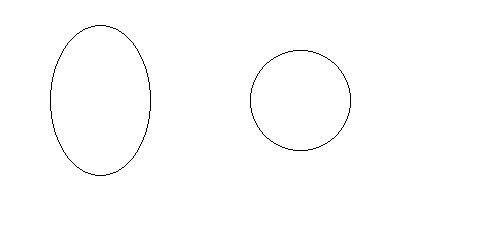

In [54]:
img